In [69]:
################# Step 1. Mounting the Google Drive to get the Dataset
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
/gdrive


In [70]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [71]:
# parent folder of sound files
INPUT_DIR="My Drive/"
# 16 KHz
SAMPLE_RATE = 16000
# seconds
MAX_SOUND_CLIP_DURATION=12  

In [4]:
set_a=pd.read_csv(INPUT_DIR+"set_a.csv")
set_a.head()

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN

In [5]:
set_a_timing=pd.read_csv(INPUT_DIR+"/set_a_timing.csv")
set_a_timing.head()

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992

In [6]:
set_b=pd.read_csv(INPUT_DIR+"set_b.csv")
set_b.head()

dataset  ... sublabel
0       b  ...      NaN
1       b  ...      NaN
2       b  ...      NaN
3       b  ...      NaN
4       b  ...      NaN

[5 rows x 4 columns]

In [7]:
#merge both set-a and set-b
frames = [set_a, set_b]
train_ab=pd.concat(frames)
train_ab.describe()

dataset                             fname   label     sublabel
count      832                               832     585          149
unique       2                               832       5            2
top          b  set_a/artifact__201106021541.wav  normal  noisynormal
freq       656                                 1     351          120

In [8]:
#get all unique labels
nb_classes=train_ab.label.unique()

print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))
print (nb_classes)

Number of training examples= 832   Number of classes= 6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


Min samples per category =  19
Max samples per category =  351


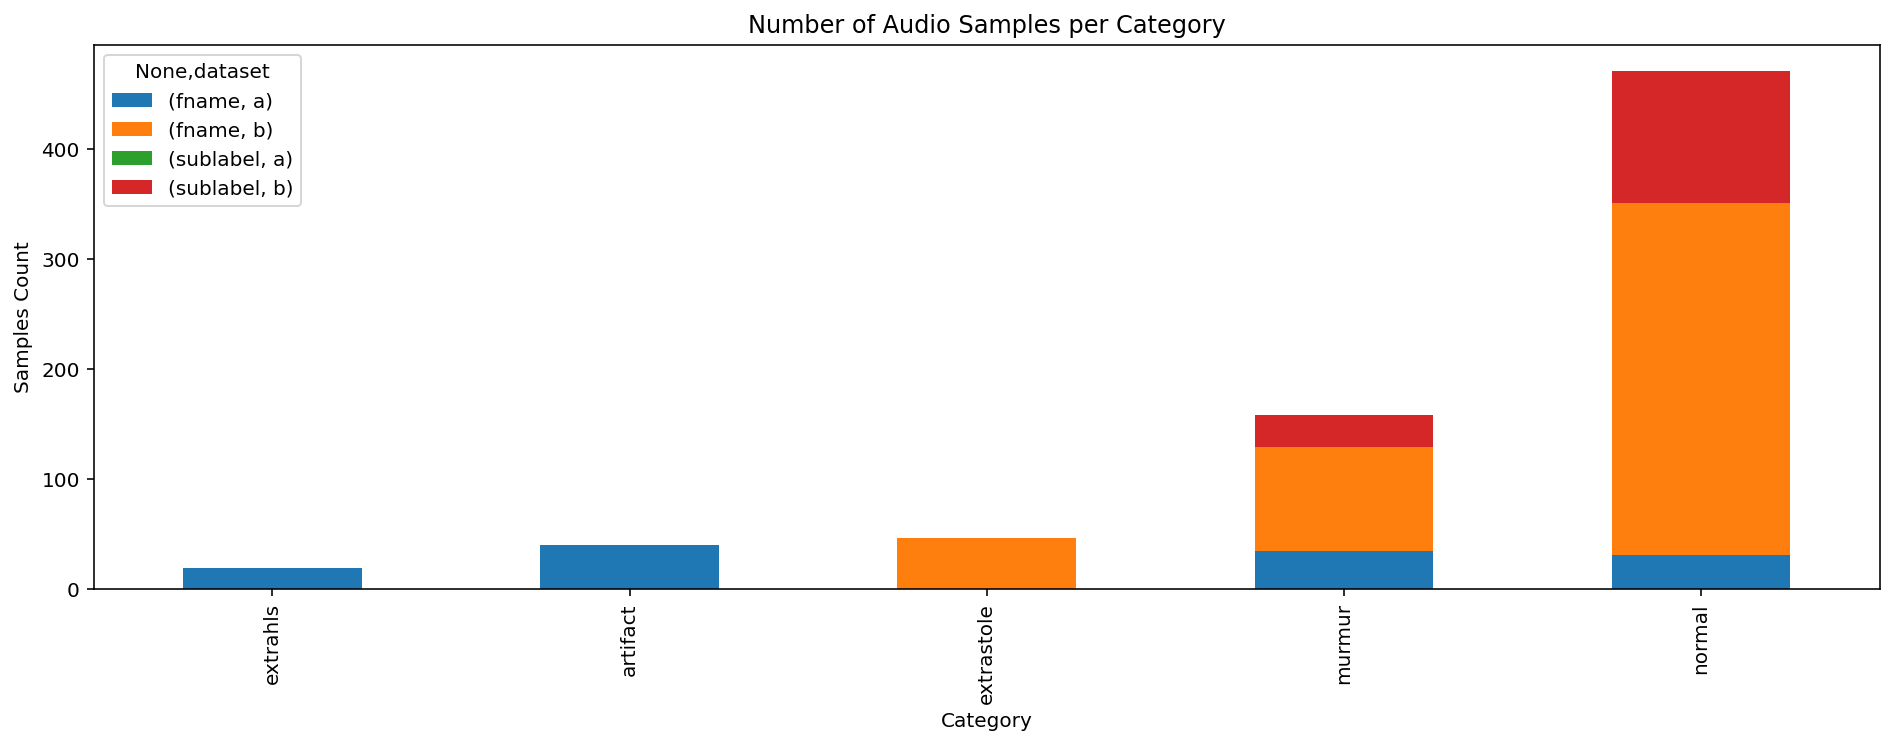

In [9]:
# visualize data distribution by category
category_group = train_ab.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

print('Min samples per category = ', min(train_ab.label.value_counts()))
print('Max samples per category = ', max(train_ab.label.value_counts()))

In [10]:
print('Minimum samples per category = ', min(train_ab.label.value_counts()))
print('Maximum samples per category = ', max(train_ab.label.value_counts()))

Minimum samples per category =  19
Maximum samples per category =  351


In [11]:
normal_file=INPUT_DIR+"set_a/normal__201106111136.wav"

In [12]:
# heart it
import IPython.display as ipd
ipd.Audio(normal_file) 

In [13]:
# Load use wave 
import wave
wav = wave.open(normal_file)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  44100
Total samples (frames) =  218903
Duration =  4.963786848072562


In [14]:
# Load use scipy
from scipy.io import wavfile
rate, data = wavfile.read(normal_file)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (218903,)
[-22835 -22726 -22595 ...   -474   -450   -439]


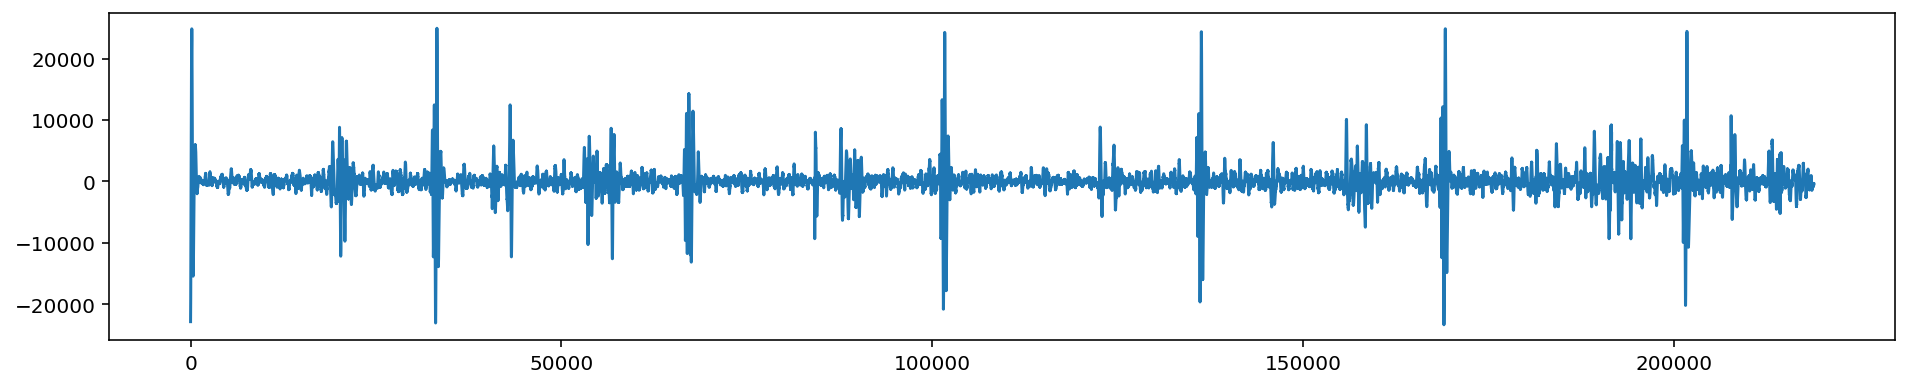

In [15]:
# plot wave by audio frames
plt.figure(figsize=(16, 3))
plt.plot(data, '-', );

In [16]:
# Load using Librosa
y, sr = librosa.load(normal_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y.shape, sr)

duration: 4.963809523809524
(109452,) 22050


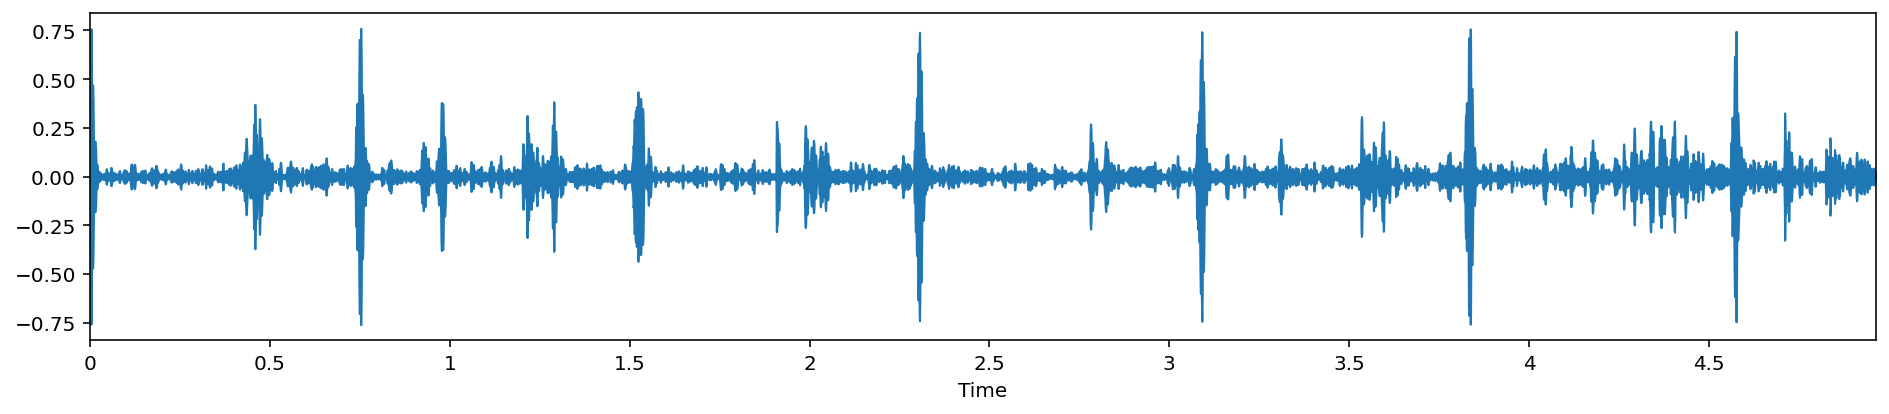

In [17]:
# librosa plot
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y, sr=sr)

In [18]:
# murmur case
murmur_file=INPUT_DIR+"/set_a/murmur__201108222231.wav"
y2, sr2 = librosa.load(murmur_file,duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y2.shape,sr2)

duration: 4.963809523809524
(110250,) 22050


In [19]:
# heart it
import IPython.display as ipd
ipd.Audio(murmur_file) 

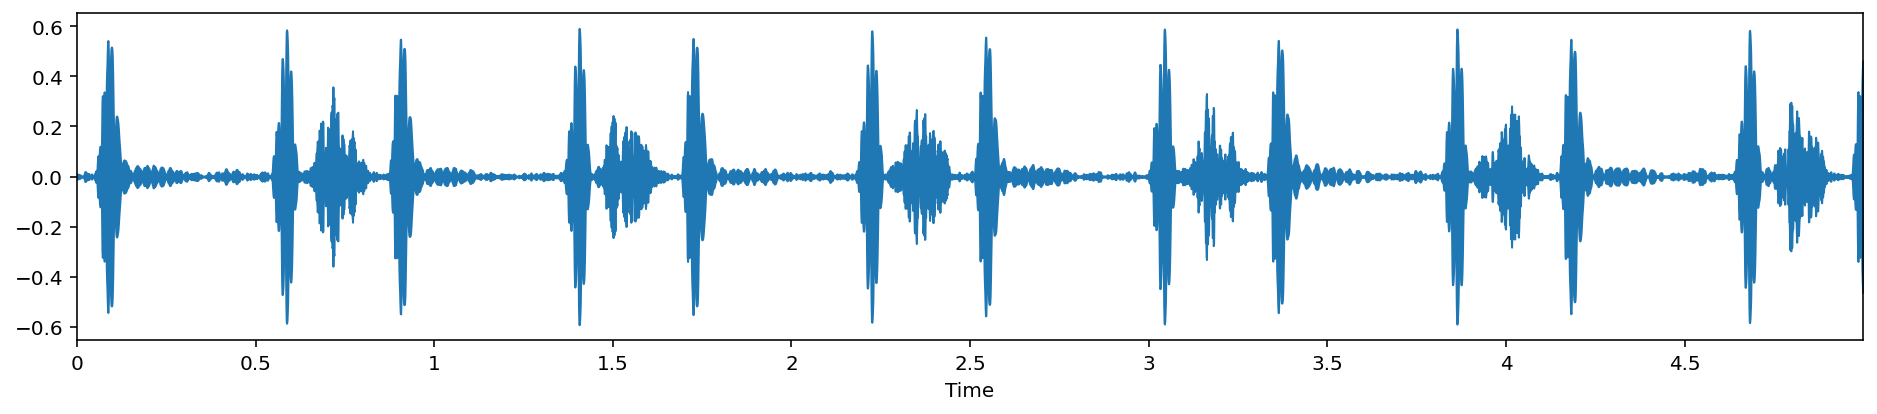

In [20]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y2, sr=sr2)

In [21]:
# Extrasystole case
extrastole_file=INPUT_DIR+"/set_b/extrastole__127_1306764300147_C2.wav"
y3, sr3 = librosa.load(extrastole_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y3.shape,sr3)

duration: 4.963809523809524
(103106,) 22050


In [22]:
# heart it
import IPython.display as ipd
ipd.Audio(extrastole_file) 

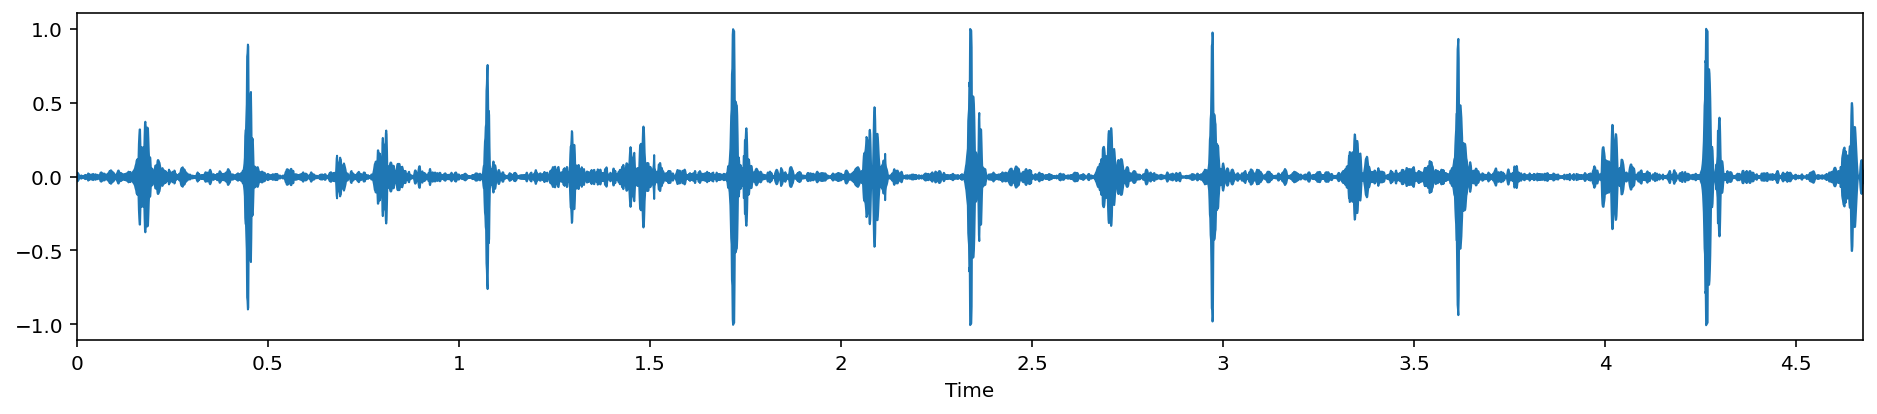

In [23]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y3, sr=sr3)

In [24]:
# sample file
artifact_file=INPUT_DIR+"/set_a/artifact__201012172012.wav"
y4, sr4 = librosa.load(artifact_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y4.shape,sr4)

duration: 4.963809523809524
(110250,) 22050


In [25]:
# heart it
import IPython.display as ipd
ipd.Audio(artifact_file) 

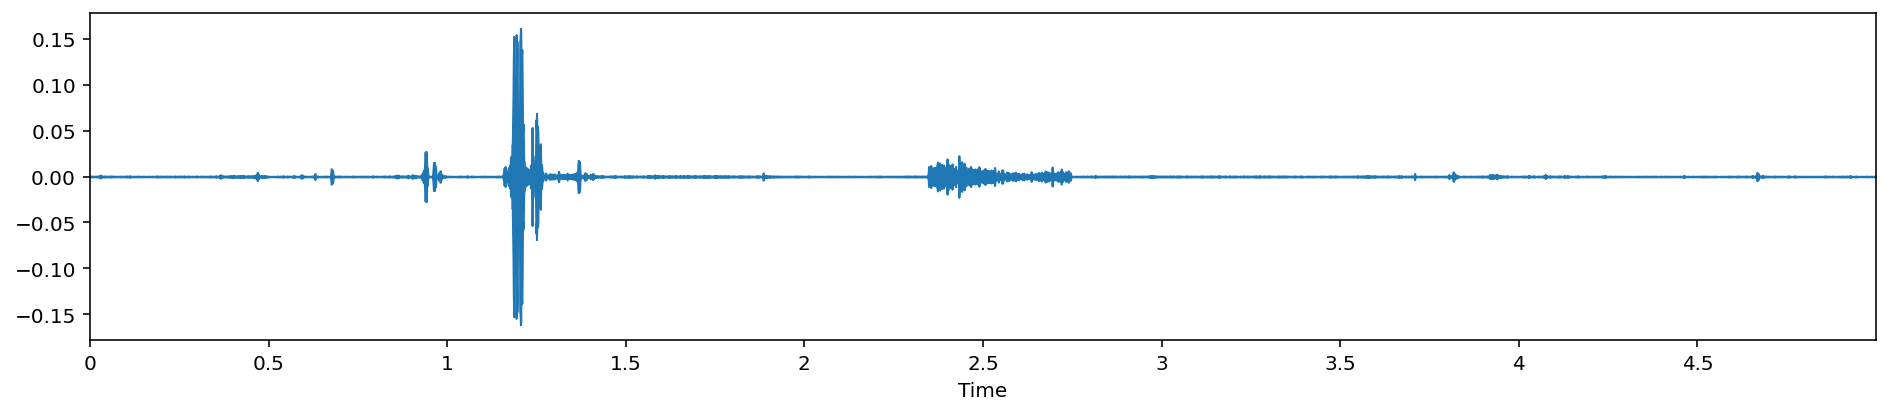

In [26]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y4, sr=sr4)

In [27]:
# sample file
extrahls_file=INPUT_DIR+"/set_a/extrahls__201101070953.wav"
y5, sr5 = librosa.load(extrahls_file, duration=5)
dur=librosa.get_duration(y)
print ("duration:", dur)
print(y5.shape,sr5)

duration: 4.963809523809524
(110250,) 22050


In [28]:
# heart it
import IPython.display as ipd
ipd.Audio(extrahls_file) 

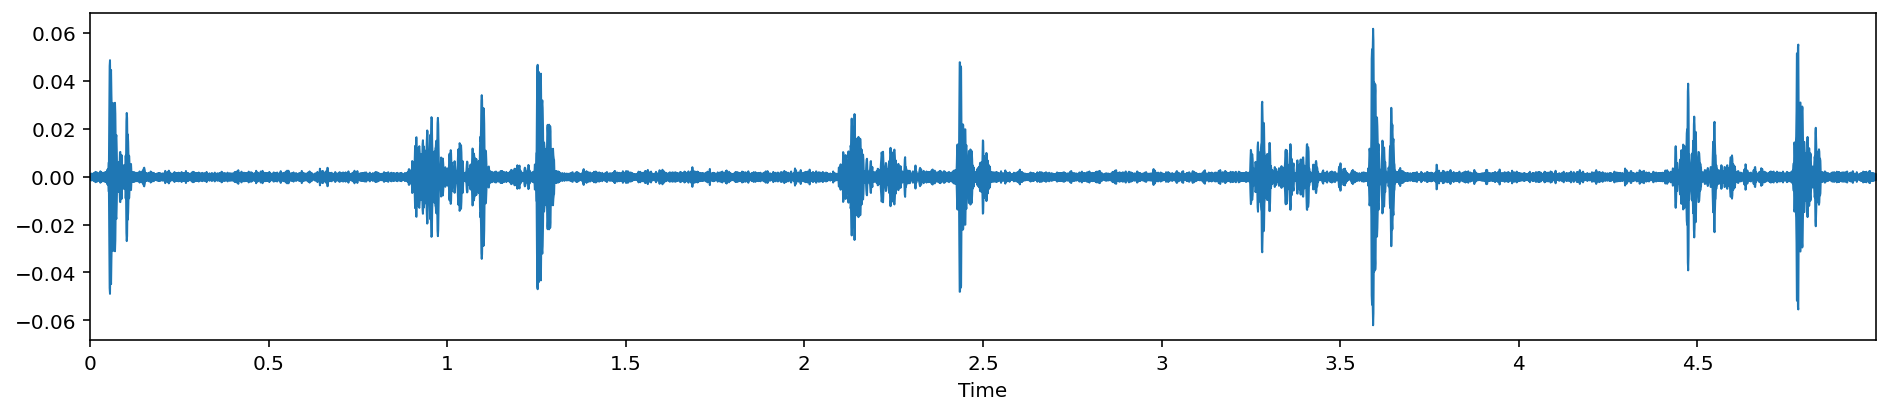

In [29]:
# show it
plt.figure(figsize=(16, 3))
librosa.display.waveplot(y5, sr=sr5)

In [31]:
# Here's a sample generate mfccs from a wave file
normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"
#y, sr = librosa.load(sample_file, offset=7, duration=7)
y, sr = librosa.load(normal_file)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print (mfccs)
print (len(mfccs))

[[-2.4546130e+02 -2.9111914e+02 -4.0244803e+02 ... -3.6787161e+02
  -3.7070840e+02 -3.7246997e+02]
 [ 8.8640701e+01  9.8866135e+01  1.3325652e+02 ...  1.5128104e+02
   1.5726184e+02  1.5245227e+02]
 [ 1.0397891e+02  8.5698502e+01  2.3744316e+01 ...  2.9162670e+01
   2.9376698e+01  3.7446297e+01]
 ...
 [-1.3324329e+01 -8.1943016e+00 -1.1898929e+00 ...  9.6601009e-02
   6.2489367e-01  1.1953502e+00]
 [ 3.1632262e-01 -4.9924183e-01 -1.5885925e-01 ...  2.2277083e+00
  -2.1508545e-01  4.8489895e+00]
 [ 3.3431330e+00 -9.8901147e-01 -2.7710872e+00 ...  2.6507771e+00
  -1.3875097e+00  1.8579394e+00]]
20


In [33]:
# Use a pre-computed log-power Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
log_S=librosa.feature.mfcc(S=librosa.power_to_db(S))
print (len(y))

109452


In [34]:
# Get more components
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
#print (mfccs)

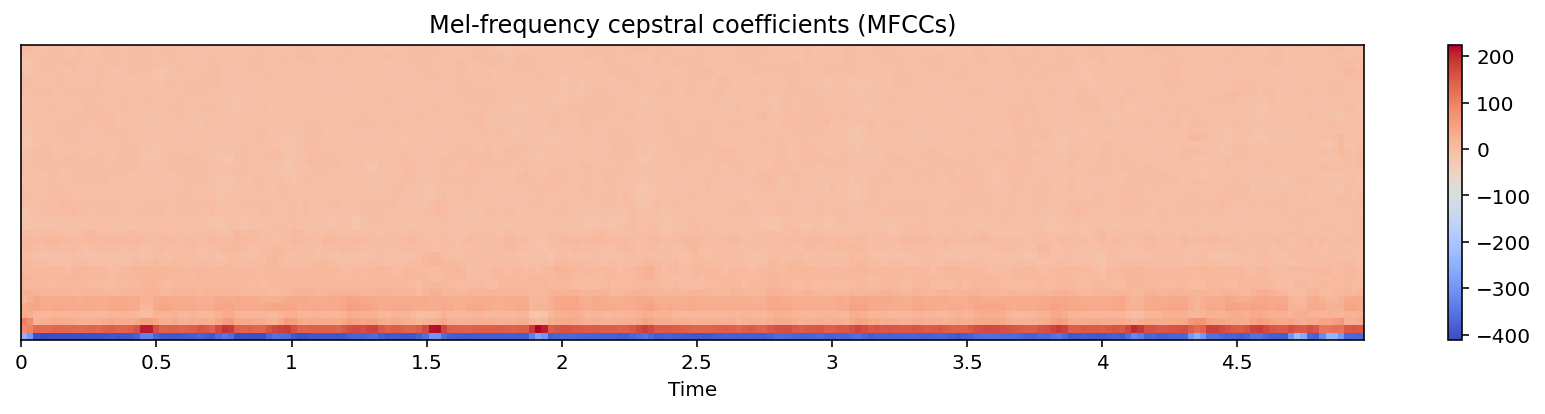

In [35]:
# Visualize the MFCC series
# Mel-frequency cepstral coefficients (MFCCs)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients (MFCCs)')
plt.tight_layout()

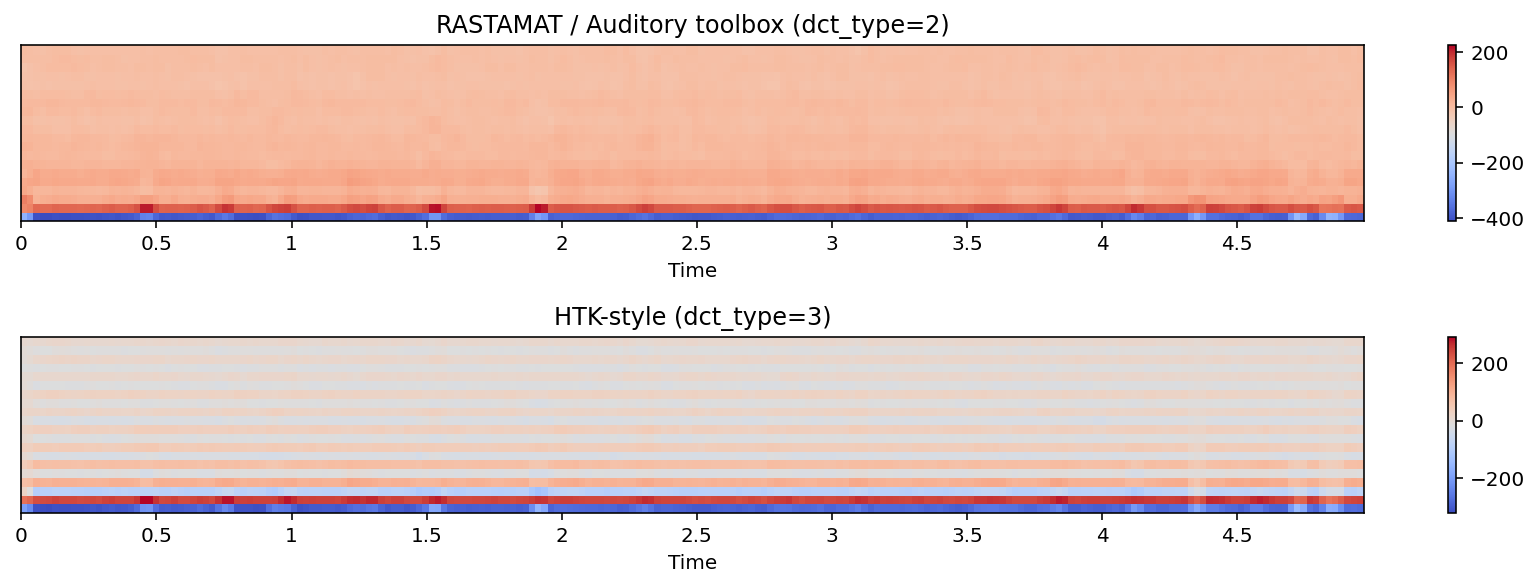

In [36]:
# Compare different DCT bases
m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)

#m_dct1 = librosa.feature.mfcc(y=y, sr=sr, dct_type=1)
plt.figure(figsize=(12, 6))
#plt.subplot(3, 1, 1)
#librosa.display.specshow(m_dct1, x_axis='time')
#plt.title('Discrete cosine transform (dct_type=1)')
#plt.colorbar()
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
plt.subplot(3, 1, 2)
librosa.display.specshow(m_slaney, x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(m_htk, x_axis='time')
plt.title('HTK-style (dct_type=3)')
plt.colorbar()
plt.tight_layout()

In [37]:
# Get onset times from a signal
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.48761905, 0.7662585 , 0.95201814, 1.25387755, 1.55573696,
       1.92725624, 2.32199546, 2.80961451, 3.11147392, 3.57587302,
       3.80807256, 3.85451247, 4.13315193, 4.36535147, 4.59755102,
       4.73687075, 4.85297052])

In [38]:
# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

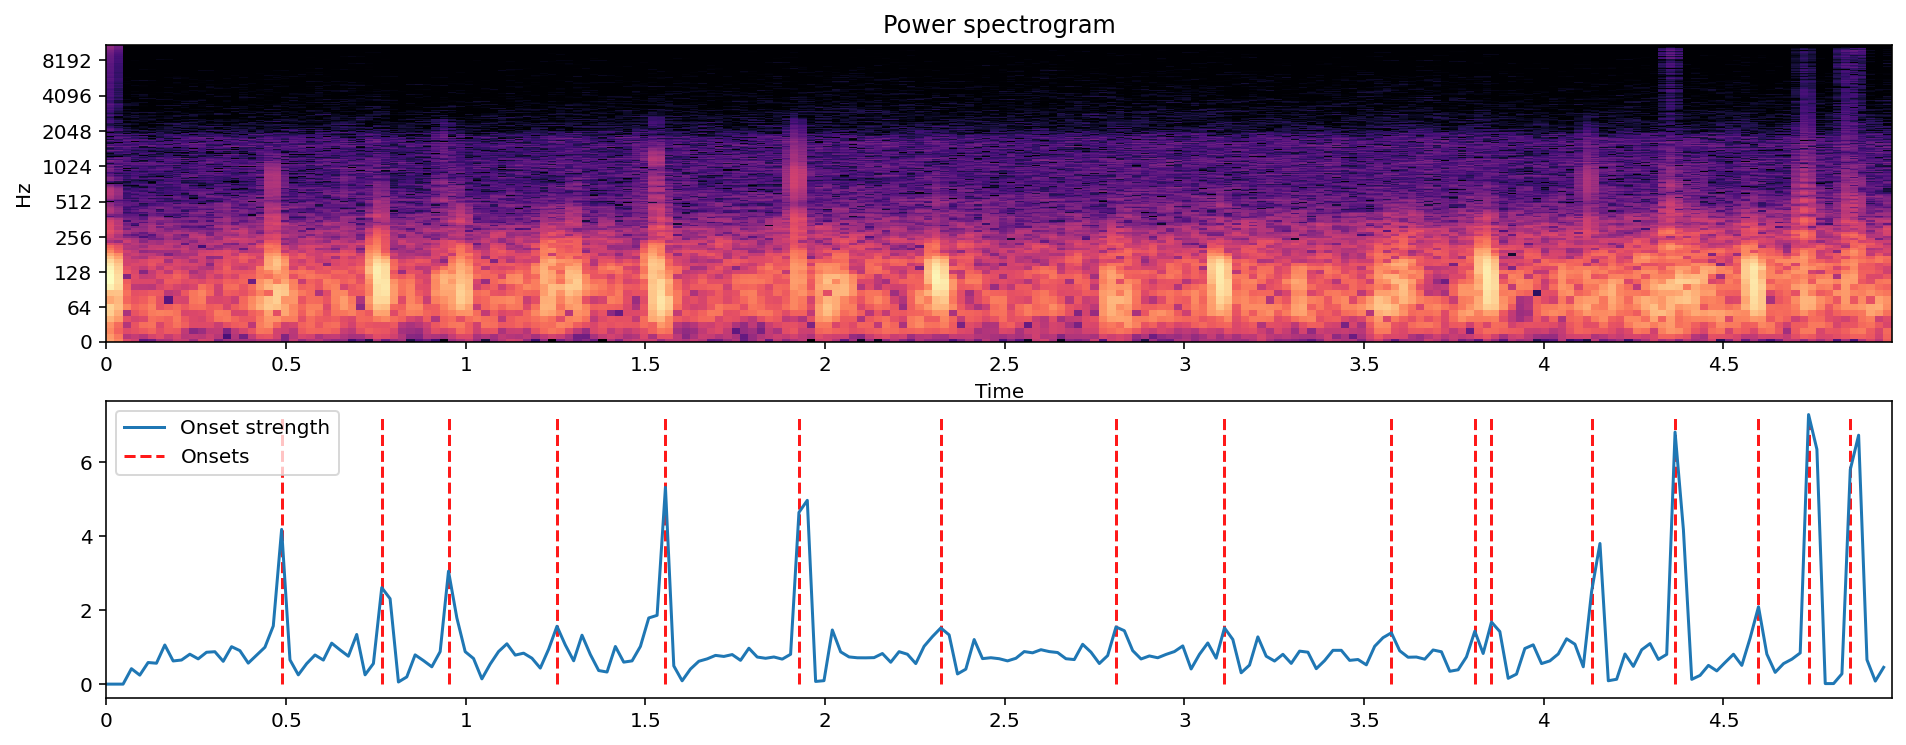

In [39]:
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

In [40]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)
# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
# Backtrack the events using the RMS values
rms = librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])

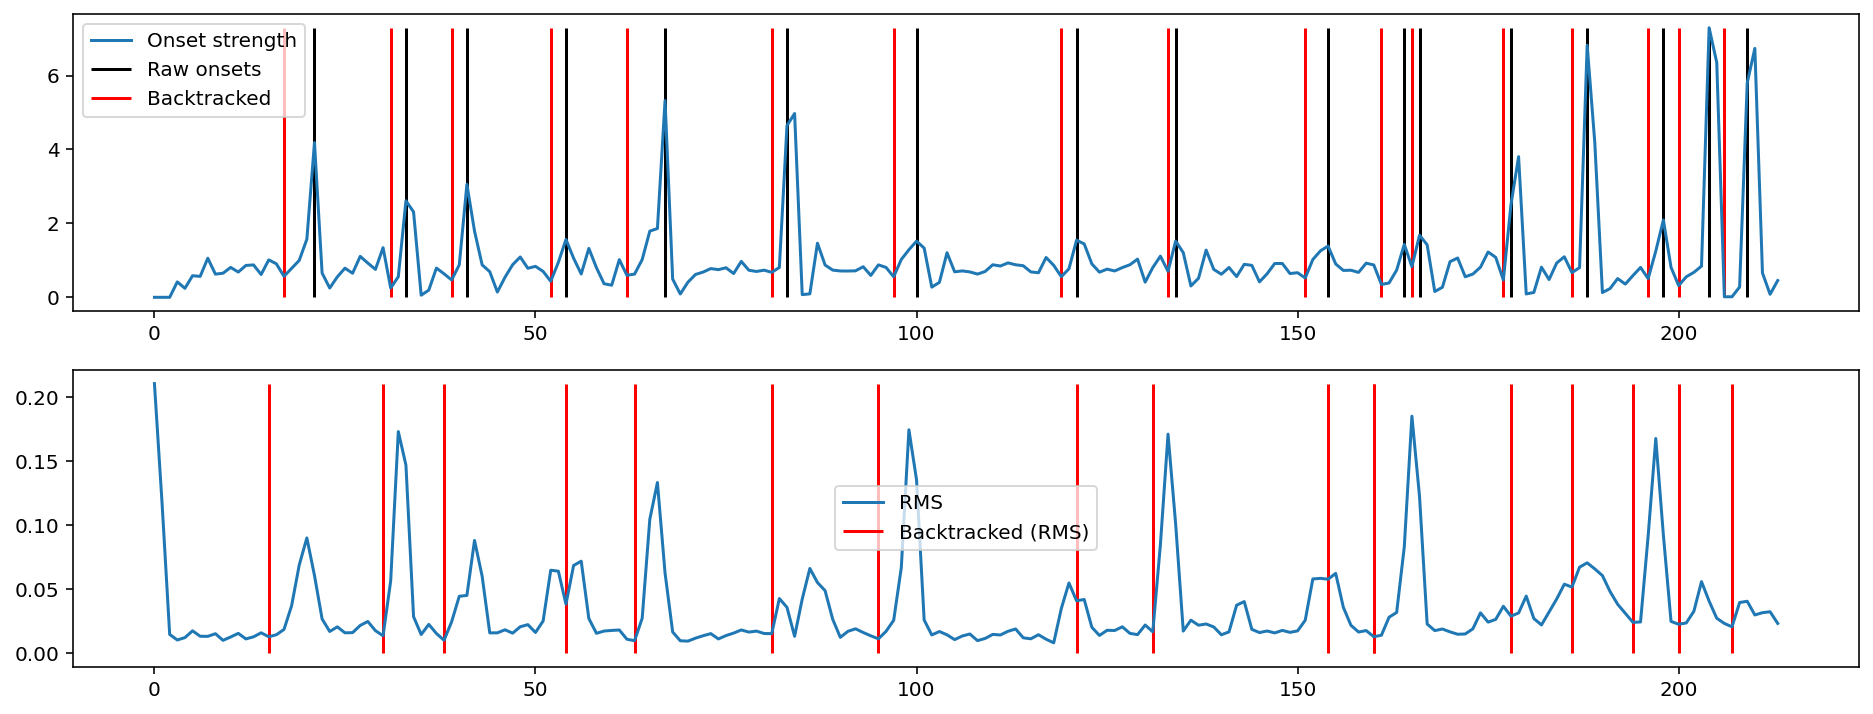

In [41]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms[0], label='RMS')
plt.vlines(onset_bt_rms, 0, rms.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)

Text(0.5, 1.0, 'Sub-band onset strength')

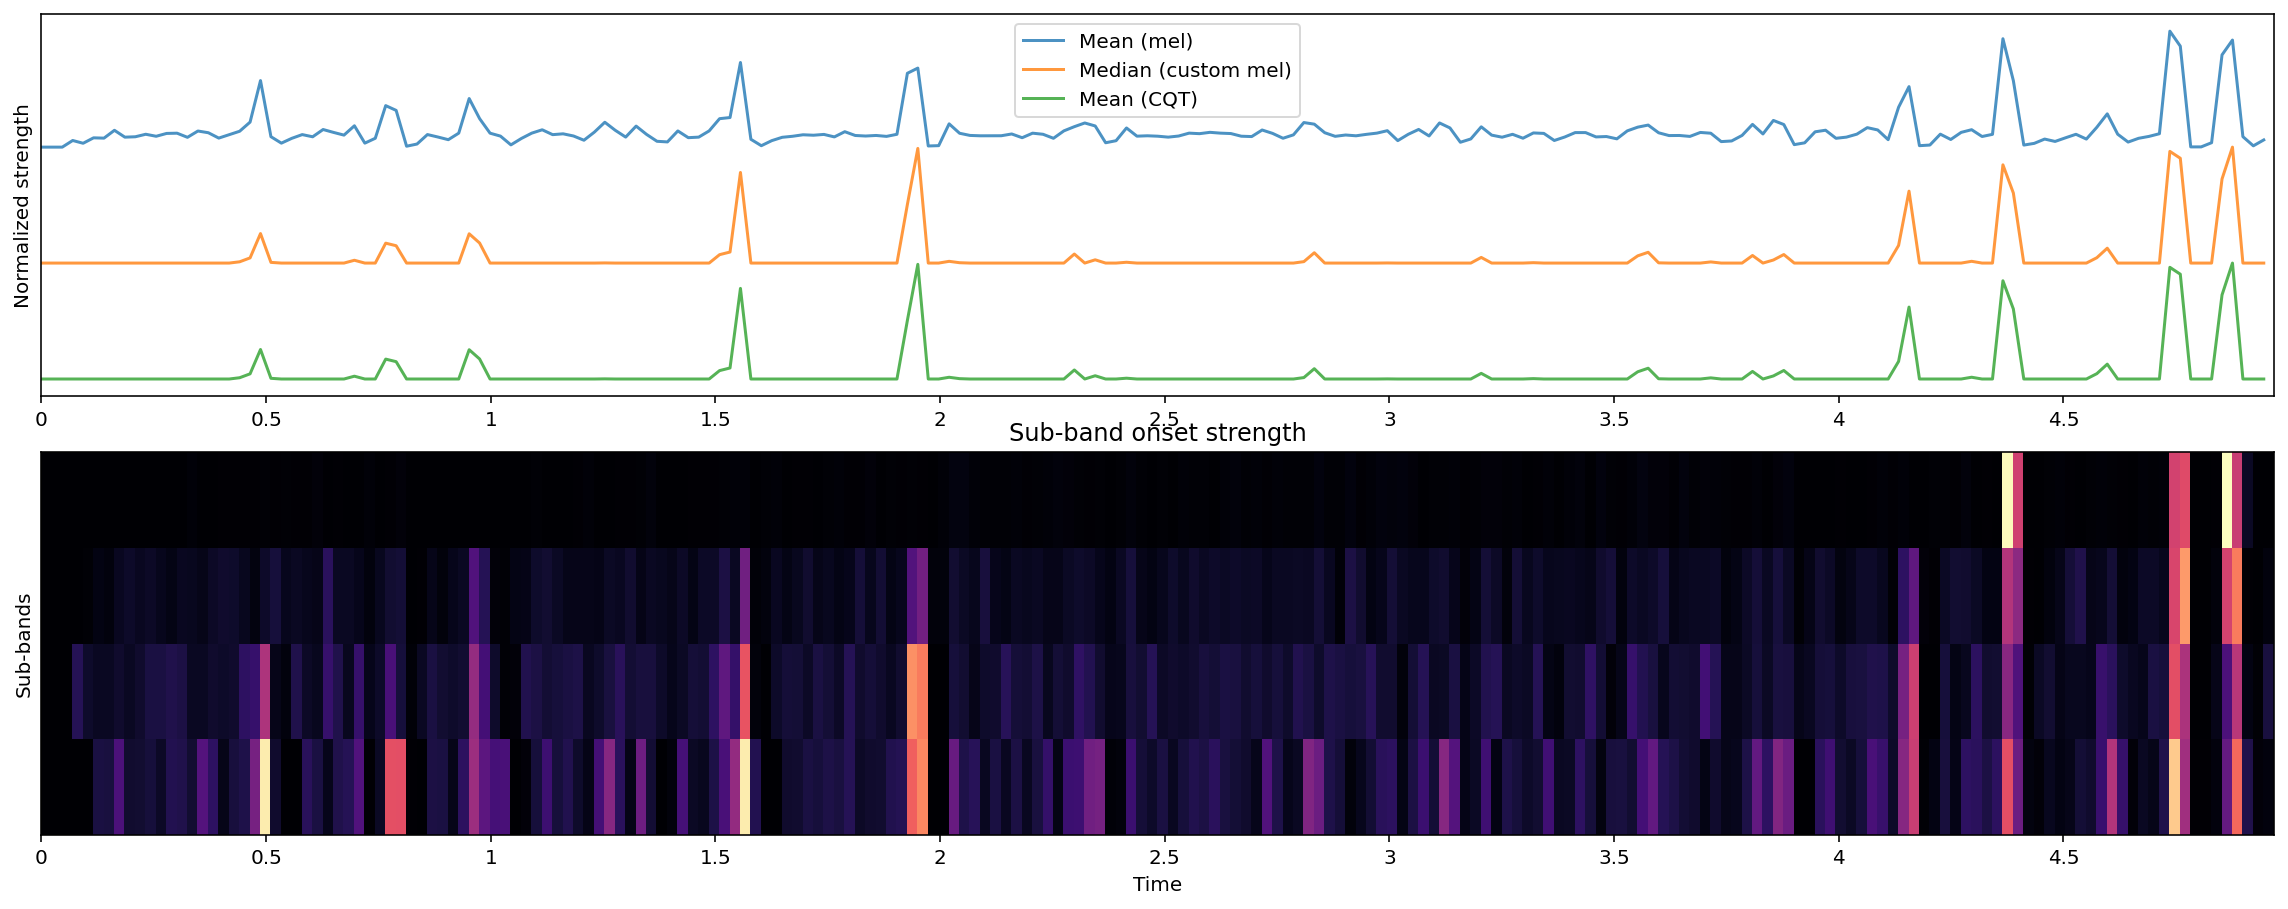

In [42]:
D = np.abs(librosa.stft(y))
times = librosa.frames_to_time(np.arange(D.shape[1]))

plt.figure(figsize=(16, 6))
#ax1 = plt.subplot(2, 1, 1)
#librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')
#plt.title('Power spectrogram')

# Construct a standard onset function
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
plt.subplot(2, 1, 1, sharex=ax1)
plt.plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,label='Mean (mel)')

# median
onset_env = librosa.onset.onset_strength(y=y, sr=sr,aggregate=np.median,fmax=8000, n_mels=256)
plt.plot(times, 1+ (onset_env/onset_env.max()), alpha=0.8,label='Median (custom mel)')

# Constant-Q spectrogram instead of Mel
#onset_env = librosa.onset.onset_strength(y=y, sr=sr,feature=librosa.cqt)
plt.plot(times, onset_env / onset_env.max(), alpha=0.8,label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()

onset_subbands = librosa.onset.onset_strength_multi(y=y, sr=sr, channels=[0, 32, 64, 96, 128])
#plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 2)
librosa.display.specshow(onset_subbands, x_axis='time')
plt.ylabel('Sub-bands')
plt.title('Sub-band onset strength')

In [43]:
print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))

Number of training examples= 832   Number of classes= 6


In [44]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

# get audio data without padding highest qualify audio
def load_file_data_without_change(folder,file_names, duration=3, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data


# get audio data with a fix padding may also chop off some file
def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            # y = audio_norm(y)            
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [45]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
# {'artifact': 0, 'murmur': 1, 'normal': 3}
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [46]:
# load dataset-a, keep them separate for testing purpose
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  My Drive//set_a/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  My Drive//set_a/artifact__201106030612.wav
fixing audio lenght : artifact__201106030612.wav
load file  My Drive//set_a/artifact__201105040918.wav
fixing audio lenght : artifact__201105040918.wav
load file  My Drive//set_a/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  My Drive//set_a/artifact__201106021541.wav
fixing audio lenght : artifact__201106021541.wav
load file  My Drive//set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  My Drive//set_a/artifact__201106010602.wav
fixing audio lenght : artifact__201106010602.wav
load file  My Drive//set_a/artifact__201106010559.wav
fixing audio lenght : artifact__201106010559.wav
load file  My Drive//set_a/artifact__201105280851.wav
fixing audio lenght : artifact__201105280851.wav
load file  My Drive//set_a/artifact__201105041959.wav
fixing audio lenght

In [47]:
%%time
# load dataset-b, keep them separate for testing purpose 
B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  My Drive//set_b/normal__129_1306344506305_D1.wav
fixing audio lenght : normal__129_1306344506305_D1.wav
load file  My Drive//set_b/normal__133_1306759619127_D.wav
fixing audio lenght : normal__133_1306759619127_D.wav
load file  My Drive//set_b/normal__117_1306262456650_B.wav
fixing audio lenght : normal__117_1306262456650_B.wav
load file  My Drive//set_b/normal__128_1306344005749_D1.wav
fixing audio lenght : normal__128_1306344005749_D1.wav
load file  My Drive//set_b/normal__127_1306764300147_B.wav
fixing audio lenght : normal__127_1306764300147_B.wav
load file  My Drive//set_b/normal__103_1305031931979_D1.wav
fixing audio lenght : normal__103_1305031931979_D1.wav
load file  My Drive//set_b/normal__106_1306776721273_D1.wav
fixing audio lenght : normal__106_1306776721273_D1.wav
load file  My Drive//set_b/normal__103_1305031931979_D3.wav
fixing audio lenght : normal__103_1305031931979_D3.wav
load file  My Drive//set_b/normal__106_1306776721273_C2.wav
fixing audio lenght : norm

In [48]:
#combine set-a and set-b 
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [49]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

seed = 1000


In [50]:
from sklearn.model_selection import StratifiedKFold
import os
import time
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


pred = pd.DataFrame()
actual = pd.DataFrame()
pred_df = pd.DataFrame()
pred_df_svms = pd.DataFrame()
pred_df_svmr = pd.DataFrame()
pred_df_lrl1 = pd.DataFrame()
pred_df_lrl2 = pd.DataFrame()
pred_df_dtc = pd.DataFrame()
pred_df_rfc = pd.DataFrame()
pred_df_knnc = pd.DataFrame()
pred_df_gnc = pd.DataFrame()
pred_df_bc = pd.DataFrame()
pred_df_rc = pd.DataFrame()
pred_df = pd.DataFrame()



actual_df = pd.DataFrame()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)

accuracy = 0.0
i = 1
x_data = x_data.reshape((x_data.shape[0],x_data.shape[1]))
training = x_data
target = y_data
for trn_idx, val_idx in folds.split(training, target):
    #print("TRAIN:", trn_idx, "TEST:", val_idx)
    Xtrain, Xtest = training[trn_idx], training[val_idx]
    Ytrain, Ytest = target[trn_idx], target[val_idx]
    
    dtrain = xgb.DMatrix(Xtrain, label=Ytrain)
    dtest = xgb.DMatrix(Xtest, label=Ytest)

   
    # set xgboost params
    param = {
        'max_depth': 9,  # the maximum depth of each tree
        'eta': 0.3,  # the training step for each iteration
        'silent': 1,  # logging mode - quiet
        'objective': 'multi:softprob',  # error evaluation for multiclass training
        'num_class': 6}  # the number of classes that exist in this datset
    num_round = 1000  # the number of training iterations
    
    #------------- numpy array ------------------
    # training and testing - numpy matrices
    bst = xgb.train(param, dtrain, num_round)
    preds = bst.predict(dtest)

    actual = pd.DataFrame(Ytest)
    print(actual.shape)
    actual_df = pd.concat([actual_df,actual])
    print(actual_df.shape)
    best_preds = np.asarray([np.argmax(line) for line in preds])
    pred = pd.DataFrame(best_preds)
    pred_df = pd.concat([pred_df,pred])
    print ("Numpy array precision:", precision_score(Ytest, best_preds, average='macro'))
    accuracy1 = accuracy_score(Ytest, best_preds)
    accuracy += accuracy1
    #mod = directory + str(i)+"_0001.model"
    #bst.save_model(mod)
    #i += 1

    ##################################### Feature Selection ###########################################
    start_time = time.time()
    mod = RandomForestClassifier()
    param = {"n_estimators": [100],
    	 "criterion": ["gini","entropy"],
    	 "max_features": ["auto","sqrt","log2",None],
    	 "oob_score": [True, False]}
    
    grid = GridSearchCV(mod, param, n_jobs=1)
    grid.fit(Xtrain,Ytrain)
    
    clf5 = RandomForestClassifier(n_estimators=grid.best_params_["n_estimators"],criterion=grid.best_params_["criterion"],max_features=grid.best_params_["max_features"],oob_score=grid.best_params_["oob_score"])
    
    clf5.fit(Xtrain,Ytrain)
    clf5.feature_importances_
    modi = SelectFromModel(clf5, prefit=True)
    Xtrain = modi.transform(Xtrain)
    Xtest = modi.transform(Xtest)
    print("--- %s seconds ---" % (time.time() - start_time))
    print("Feature Selection Code......")
    #X2 = modi.transform(X2)
    
    #####################################  Classification Models ######################################
    
    ################################################################################################### SVM
    start_time = time.time()
    mod = SVC()
    
    #################################### SVR-Sigmoid
    
    g = [pow(2,-15),pow(2,-14),pow(2,-13),pow(2,-12),pow(2,-11),pow(2,-10),pow(2,-9),pow(2,-8),pow(2,-7),pow(2,-6),pow(2,-5),pow(2,-4),pow(2,-3),pow(2,-2),pow(2,-1),pow(1,0),pow(2,1),pow(2,2),pow(2,3)]
    
    C = [pow(2,-5),pow(2,-4),pow(2,-3),pow(2,-2),pow(2,-1),pow(1,0),pow(2,1),pow(2,2),pow(2,3),pow(2,4),pow(2,5),pow(2,6),pow(2,7),pow(2,8),pow(2,9),pow(2,10),pow(2,11),pow(2,12),pow(2,13),pow(2,14),pow(2,15)]
    
    param = {"kernel": ["sigmoid"],
         "gamma": g,
         "C":C}
    random_search = RandomizedSearchCV(mod,param,n_jobs=1,n_iter=100)
    random_search.fit(Xtrain,Ytrain)
    clf0 = SVC(kernel=random_search.best_params_["kernel"],gamma=random_search.best_params_["gamma"],C=random_search.best_params_["C"])
    print ("Check 1")
    print("--- %s seconds ---" % (time.time() - start_time))
    print("SVR-Sig------")
    ################################### SVR-RBF
    start_time = time.time()
    param= {'gamma': g,
        'kernel': ['rbf'],
        'C': C}
    grid_search = RandomizedSearchCV(mod,param,n_jobs=1,n_iter=100)
    grid_search.fit(Xtrain,Ytrain)           
    clf1 = SVC(gamma = grid_search.best_params_["gamma"],kernel=grid_search.best_params_["kernel"],C=grid_search.best_params_["C"]) 
    
    
    clf0.fit(Xtrain,Ytrain)
    z0=clf0.predict(Xtest)
    print (z0,Ytest)

    pred = pd.DataFrame(z0)
    pred_df_svms = pd.concat([pred_df_svms,pred])

    clf1.fit(Xtrain,Ytrain)
    z1=clf1.predict(Xtest)

    pred = pd.DataFrame(z1)
    pred_df_svmr = pd.concat([pred_df_svmr,pred])


    print("SVM-Sigmoid: ",accuracy_score(z0,Ytest))
    print("SVM-RBF: ",accuracy_score(z1,Ytest))
    print("--- %s seconds ---" % (time.time() - start_time))
    print("SVR-RBF------")
    print ("Check 2")
    ################################################################################################### Logistic Regression
    start_time = time.time()
    g = [pow(2,-15),pow(2,-14),pow(2,-13),pow(2,-12),pow(2,-11),pow(2,-10),pow(2,-9),pow(2,-8),pow(2,-7),pow(2,-6),pow(2,-5),pow(2,-4),pow(2,-3),pow(2,-2),pow(2,-1),pow(1,0),pow(2,1),pow(2,2),pow(2,3)]
    
    C = [pow(2,-5),pow(2,-4),pow(2,-3),pow(2,-2),pow(2,-1),pow(1,0),pow(2,1),pow(2,2),pow(2,3),pow(2,4),pow(2,5),pow(2,6),pow(2,7),pow(2,8),pow(2,9),pow(2,10),pow(2,11),pow(2,12),pow(2,13),pow(2,14),pow(2,15)]
    
    mod = LogisticRegression()
    param = {"penalty":['l1'],
    	 "dual": [False],
    	 "C":C,
    	 "fit_intercept": [True, False],
    	 "solver": ["liblinear"]}
    
    grid = GridSearchCV(mod,param,n_jobs=1)
    grid.fit(Xtrain,Ytrain)
    
    clf2 = LogisticRegression(penalty=grid.best_params_["penalty"],dual=grid.best_params_["dual"],C=grid.best_params_["C"],fit_intercept=grid.best_params_["fit_intercept"],solver=grid.best_params_["solver"])
    print("--- %s seconds ---" % (time.time() - start_time))
    print("LR-L1------")
    
    start_time = time.time()
    param = {"penalty":['l2'],
    	 "dual": [False],
    	 "C":C,
    	 "fit_intercept": [True, False],
    	 "solver": ["newton-cg", "lbfgs", "liblinear", "sag"]}
    
    grid = GridSearchCV(mod,param,n_jobs=1)
    grid.fit(Xtrain,Ytrain)
    
    clf3 = LogisticRegression(penalty=grid.best_params_["penalty"],dual=grid.best_params_["dual"],C=grid.best_params_["C"],fit_intercept=grid.best_params_["fit_intercept"],solver=grid.best_params_["solver"])
    
    
    clf2.fit(Xtrain,Ytrain)
    z2 = clf2.predict(Xtest)
    
    pred = pd.DataFrame(z2)
    pred_df_lrl1 = pd.concat([pred_df_lrl1,pred])

    
    clf3.fit(Xtrain,Ytrain)
    z3 = clf3.predict(Xtest)

    pred = pd.DataFrame(z3)
    pred_df_lrl2 = pd.concat([pred_df_lrl2,pred])


    print ("Logistic l1: ",accuracy_score(z2,Ytest))
    print ("Logistic l2: ",accuracy_score(z3,Ytest))
    
    print("--- %s seconds ---" % (time.time() - start_time))
    print("LR-L2------")
    print ("check 3")
    ################################################################################################### Decision Trees
    start_time = time.time()
    mod = DecisionTreeClassifier()
    param = {"criterion": ["gini","entropy"],
    	 "splitter": ["best","random"]}
    
    grid = GridSearchCV(mod,param,n_jobs=1)
    grid.fit(Xtrain,Ytrain)
    
    clf4 = DecisionTreeClassifier(criterion=grid.best_params_["criterion"],splitter=grid.best_params_["splitter"])
    
    clf4.fit(Xtrain,Ytrain)
    z4 = clf4.predict(Xtest)

    pred = pd.DataFrame(z4)
    pred_df_dtc = pd.concat([pred_df_dtc,pred])

    print("Decition trees Claasifier: ", accuracy_score(z4,Ytest))
    
    print("--- %s seconds ---" % (time.time() - start_time))
    print("Decision Trees ------")
    
    print ("check 4")
    ################################################################################################### Random Forest
    start_time = time.time()
    mod = RandomForestClassifier()
    param = {"n_estimators": [100,500],
    	 "criterion": ["gini","entropy"],
    	 "max_features": ["auto","sqrt","log2",None],
    	 "oob_score": [True, False]}
    
    grid = GridSearchCV(mod, param, n_jobs=1)
    grid.fit(Xtrain,Ytrain)
    
    clf5 = RandomForestClassifier(n_estimators=grid.best_params_["n_estimators"],criterion=grid.best_params_["criterion"],max_features=grid.best_params_["max_features"],oob_score=grid.best_params_["oob_score"])
    
    clf5.fit(Xtrain,Ytrain)
    z5 = clf5.predict(Xtest)
    
    pred = pd.DataFrame(z5)
    pred_df_rfc = pd.concat([pred_df_rfc,pred])

    print("Random Forest: ",accuracy_score(z5,Ytest))
    
    print("--- %s seconds ---" % (time.time() - start_time))
    print("Random Forest ------")
    print ("check 5")
    ################################################################################################### KNN
    
    
    start_time = time.time()
    mod = KNeighborsClassifier()
    param = {"n_neighbors": range(1,100,1),
    	 "weights": ["uniform", "distance"],
    	 "algorithm": ["auto","ball_tree","kd_tree","brute"],
    	 "p":[1,2]}
    grid = RandomizedSearchCV(mod,param,n_jobs=1,n_iter=100)
    grid.fit(Xtrain,Ytrain)
    clf11 = KNeighborsClassifier(n_neighbors=grid.best_params_["n_neighbors"],weights=grid.best_params_["weights"],algorithm=grid.best_params_["algorithm"],p=grid.best_params_["p"])
    print("--- %s seconds ---" % (time.time() - start_time))
    clf11.fit(Xtrain, Ytrain)
    z11 = clf11.predict(Xtest)
    
    pred = pd.DataFrame(z11)
    pred_df_knnc = pd.concat([pred_df_knnc,pred])
    
    print("KNN: ",accuracy_score(z11,Ytest))
    print ("check 7")



(117, 1)
(117, 1)
Numpy array precision: 0.7618773946360152
--- 49.40873193740845 seconds ---
Feature Selection Code......
Check 1
--- 4.180480003356934 seconds ---
SVR-Sig------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2] [0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
SVM-Sigmoid:  0.6068376068376068
SVM-RBF:  0.7948717948717948
--- 16.803208589553833 seconds ---
SVR-RBF------
Check 2
--- 17.323137760162354 seconds ---
LR-L1------
Logistic l1:  0.717948717948718
Logistic l2:  0.7435897435897436
--- 55.55600690841675 seconds ---
LR-L2------
check 3
Decition trees Claasifier:  0.6324786324786325
--- 0.09930

KeyboardInterrupt: ignored

In [ ]:
#%% Evaluation and Results
class_names = [0,1,2,3,4,5]
plot_confusion_matrix(actual_df.values, pred_df.values, classes=class_names,
                      title='Confusion matrix, without normalization XGBOOST')

accuracy = accuracy/5
print("Accuracy for the NO SPLIT XGBoost: ", accuracy)
#%%
plot_confusion_matrix(actual_df.values, pred_df_svms.values, classes=class_names,
                      title='Confusion matrix, without normalization SVM Sigmoid')

accuracy = accuracy_score(pred_df_svms , actual_df)
print("Accuracy for the NO SPLIT SVM Sigmoid: ", accuracy)
#%%
plot_confusion_matrix(actual_df.values, pred_df_svmr.values, classes=class_names,
                      title='Confusion matrix, without normalization SVM RBF')

accuracy = accuracy_score(pred_df_svmr , actual_df)
print("Accuracy for the NO SPLIT SVM RBF: ", accuracy)

#%%
plot_confusion_matrix(actual_df.values, pred_df_lrl1.values, classes=class_names,
                      title='Confusion matrix, without normalization LR L1')

accuracy = accuracy_score(pred_df_lrl1 , actual_df)
print("Accuracy for the NO SPLIT LR L1: ", accuracy)

#%%

plot_confusion_matrix(actual_df.values, pred_df_lrl2.values, classes=class_names,
                      title='Confusion matrix, without normalization LR L2')

accuracy = accuracy_score(pred_df_lrl2 , actual_df)
print("Accuracy for the NO SPLIT LR L2: ", accuracy)

#%%

plot_confusion_matrix(actual_df.values, pred_df_dtc.values, classes=class_names,
                      title='Confusion matrix, without normalization Decision Tree')

accuracy = accuracy_score(pred_df_dtc , actual_df)
print("Accuracy for the NO SPLIT Decision Tree: ", accuracy)

#%%

plot_confusion_matrix(actual_df.values, pred_df_rfc.values, classes=class_names,
                      title='Confusion matrix, without normalization Random Forest')

accuracy = accuracy_score(pred_df_rfc , actual_df)
print("Accuracy for the NO SPLIT Random Forest: ", accuracy)

#%%
plot_confusion_matrix(actual_df.values, pred_df_knnc.values, classes=class_names,
                      title='Confusion matrix, without normalization KNN')

accuracy = accuracy_score(pred_df_knnc , actual_df)
print("Accuracy for the NO SPLIT KNN: ", accuracy)

In [72]:
%%time
INPUT_DIR="My Drive/"
dataset = []
for folder in ["My Drive/set_a/**","My Drive/set_b/**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]
            # skip audio smaller than 4 secs
            if librosa.get_duration(filename=filename)>=4:
                if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
                    dataset.append({
                        "filename": filename,
                        "label": label
                    })
dataset = pd.DataFrame(dataset)
#dataset = shuffle(dataset, random_state=42)

CPU times: user 272 ms, sys: 176 ms, total: 447 ms
Wall time: 1.59 s


In [73]:
dataset

filename     label
0            My Drive/set_a/artifact__201105190800.wav  artifact
1            My Drive/set_a/artifact__201106030612.wav  artifact
2            My Drive/set_a/artifact__201105040918.wav  artifact
3            My Drive/set_a/artifact__201105051017.wav  artifact
4            My Drive/set_a/artifact__201106021541.wav  artifact
..                                                 ...       ...
399  My Drive/set_b/normal_noisynormal_284_13111684...    normal
400  My Drive/set_b/normal_noisynormal_278_13111633...    normal
401  My Drive/set_b/normal_noisynormal_264_13093561...    normal
402  My Drive/set_b/normal_noisynormal_270_13093695...    normal
403  My Drive/set_b/normal_noisynormal_271_13093698...    normal

[404 rows x 2 columns]

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  404 non-null    object
 1   label     404 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


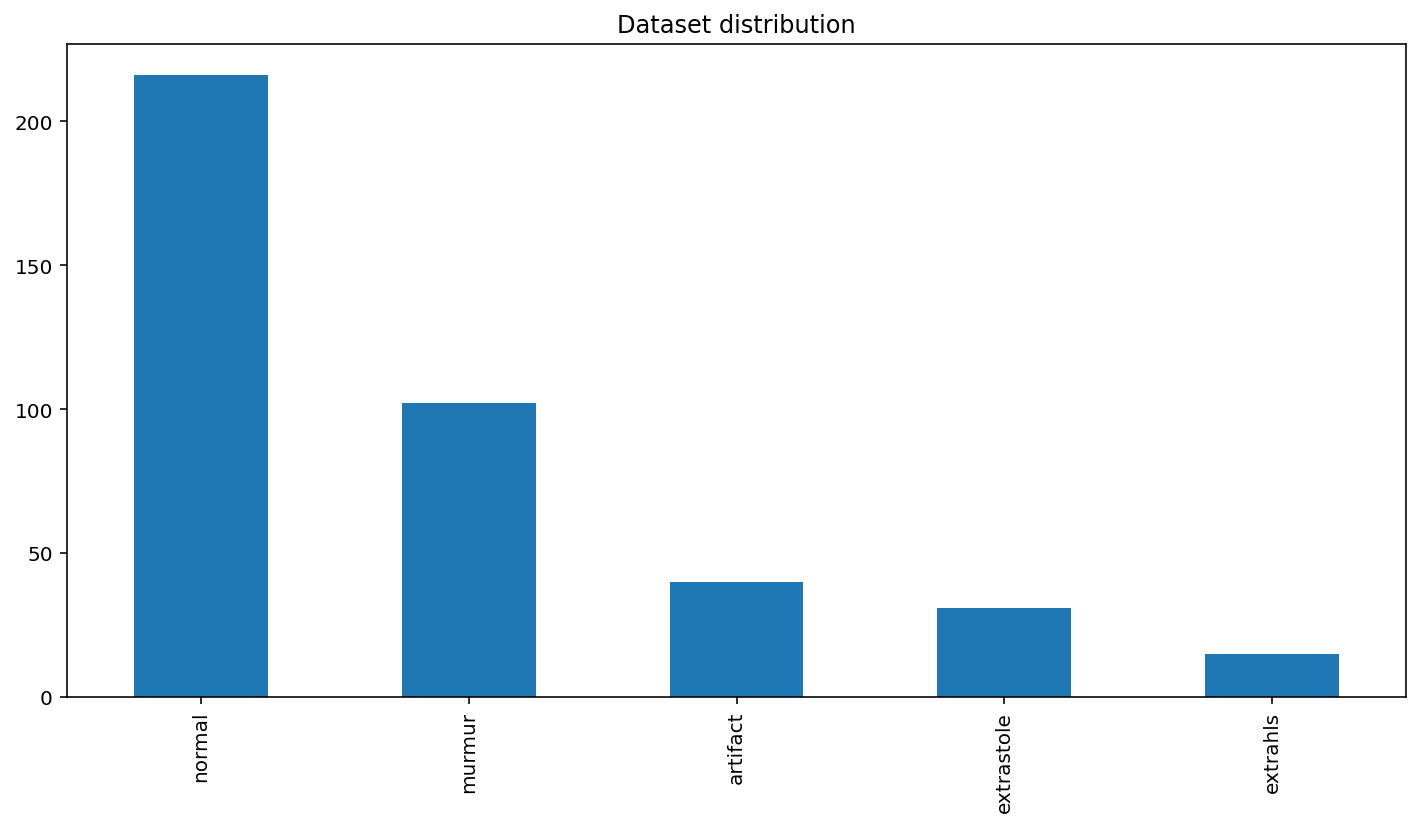

In [75]:
plt.figure(figsize=(12,6))
dataset.label.value_counts().plot(kind='bar', title="Dataset distribution")
plt.show()

In [76]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

print("Train: %i" % len(train))
print("Test: %i" % len(test))

Train: 323
Test: 81


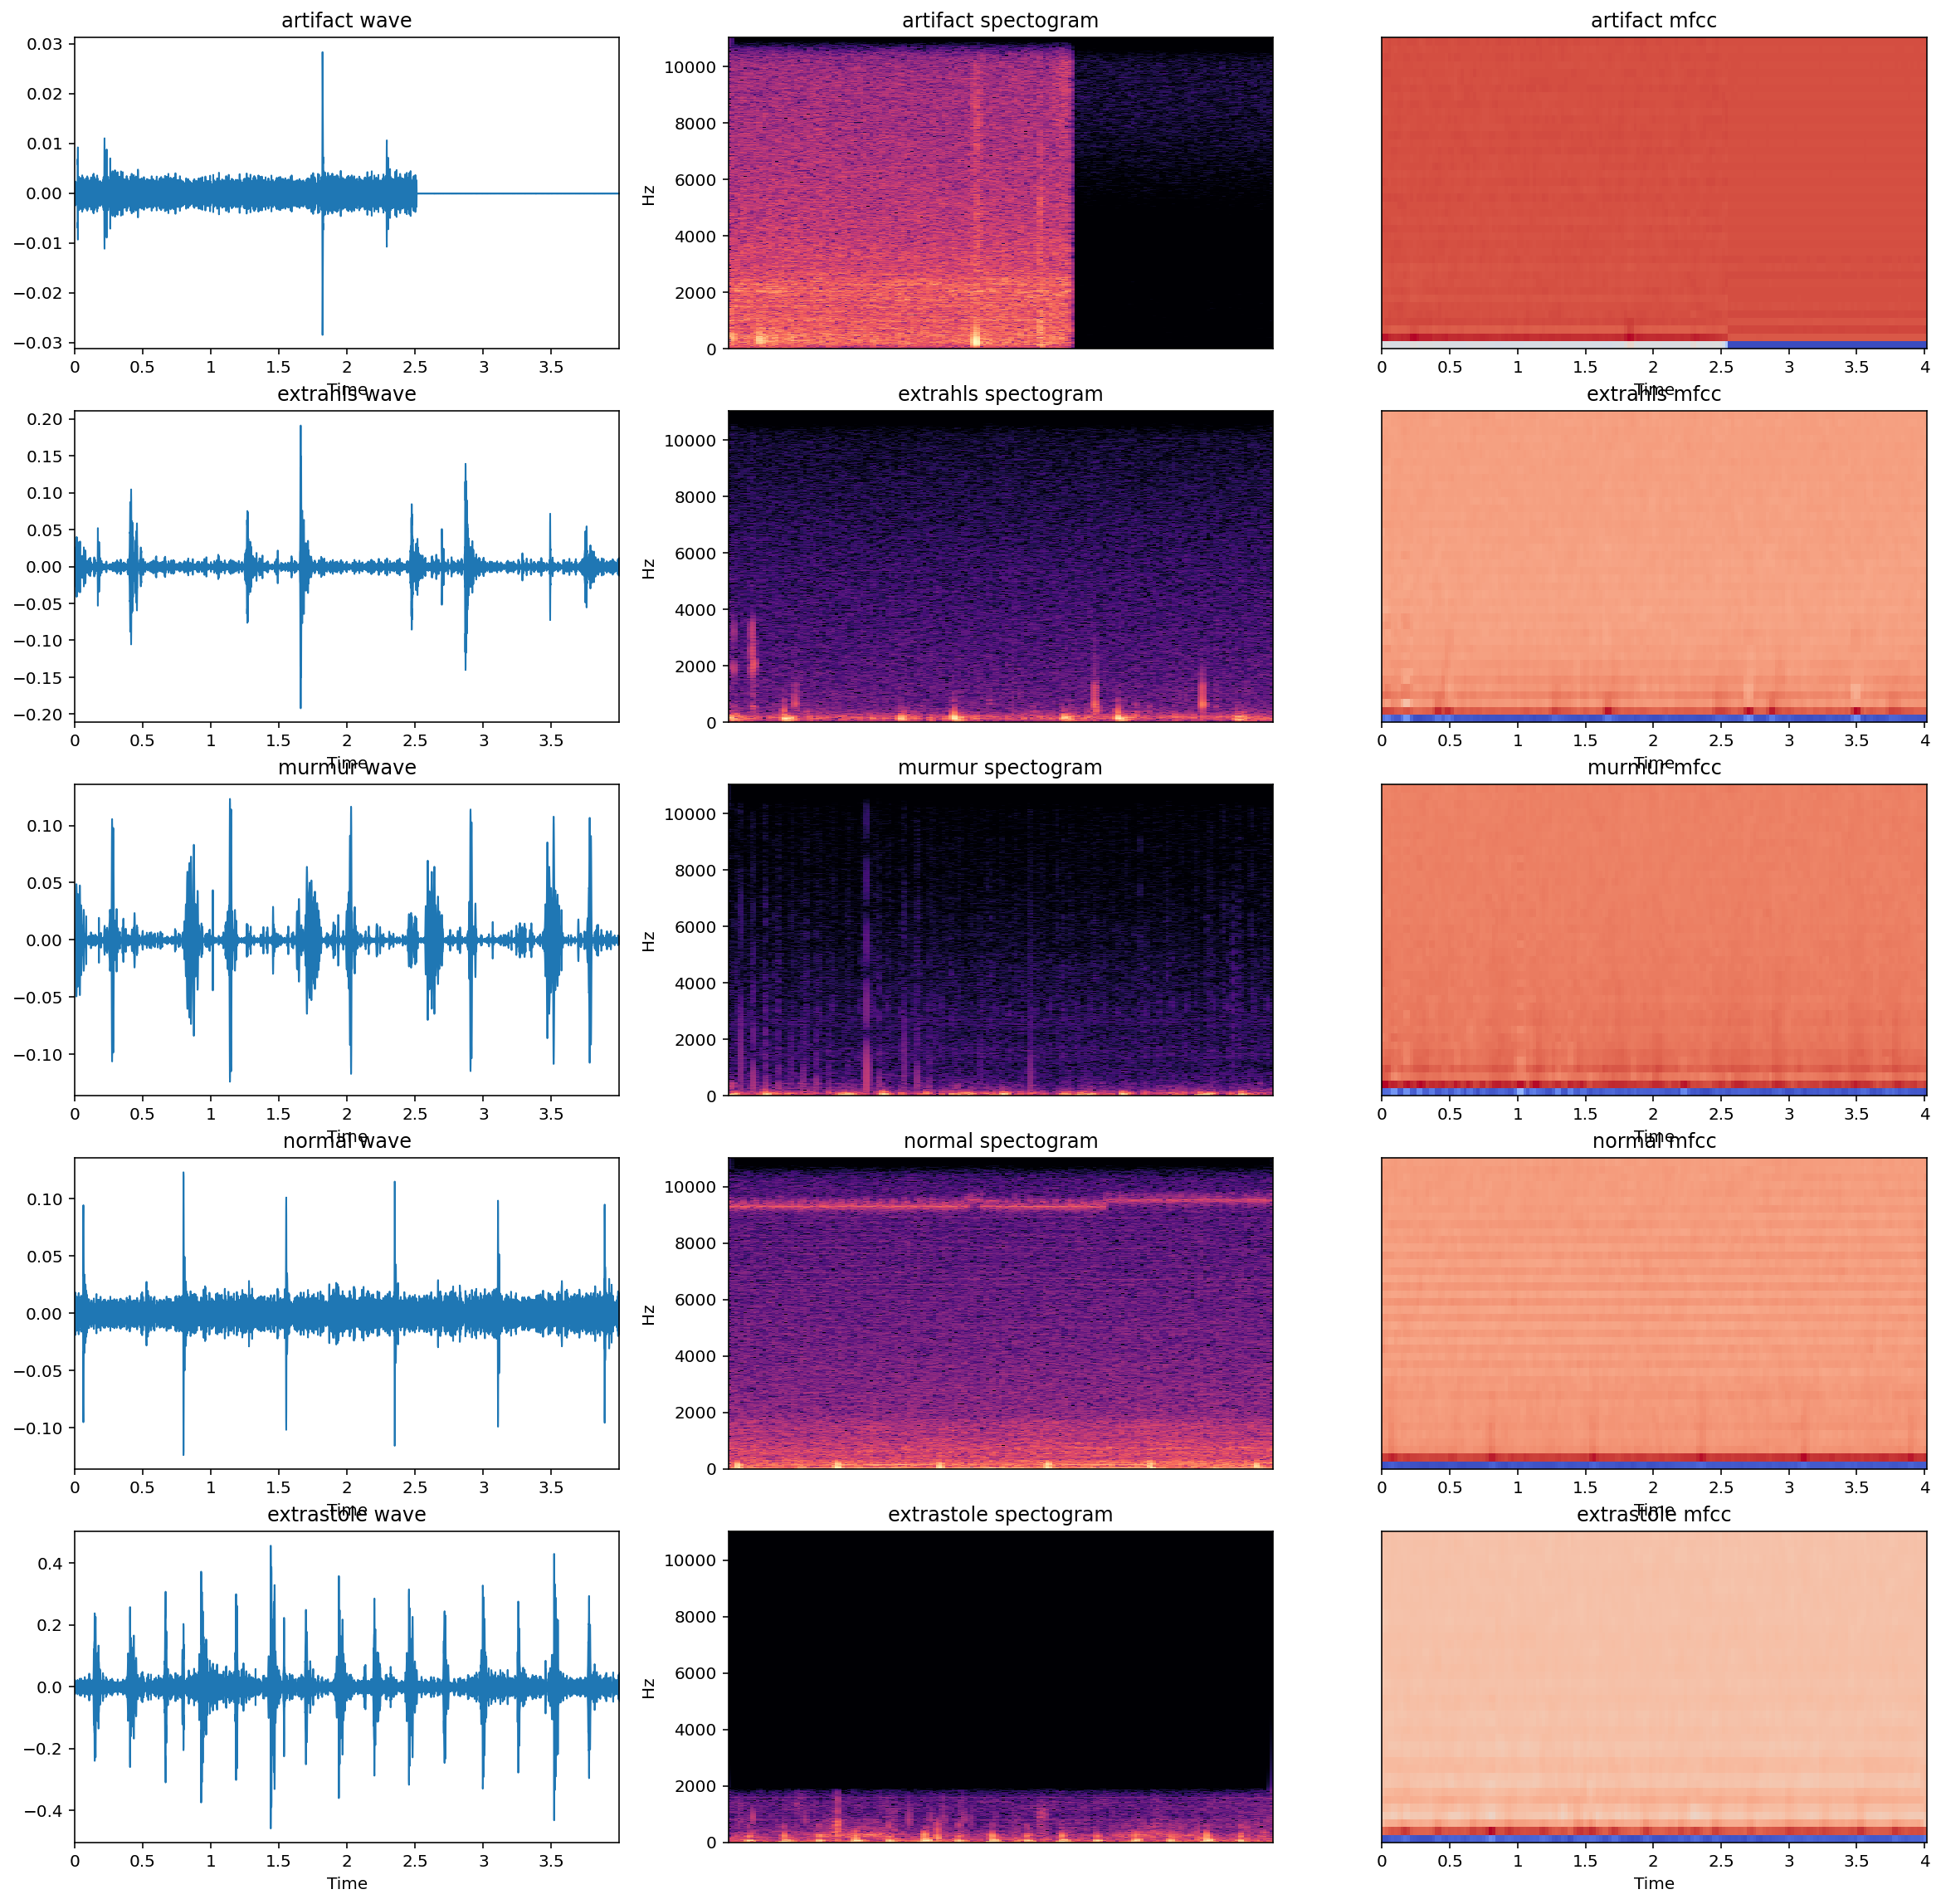

In [77]:
#%%time
plt.figure(figsize=(20,20))
idx = 0
for label in dataset.label.unique():    
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[0], duration=4)
    idx+=1
    plt.subplot(5, 3, idx)
    plt.title("%s wave" % label)
    librosa.display.waveplot(y, sr=sr)
    idx+=1
    plt.subplot(5, 3, idx)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear')
    plt.title("%s spectogram" % label)
    idx+=1
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    plt.subplot(5, 3, idx)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("%s mfcc" % label)
plt.show()

In [78]:
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, duration=4)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfccs

In [79]:
from tqdm import tqdm
x_train, x_test = [], []
print("Extract features from TRAIN  and TEST dataset")
for idx in tqdm(range(len(train))):
    x_train.append(extract_features(train.filename.iloc[idx]))

for idx in tqdm(range(len(test))):
    x_test.append(extract_features(test.filename.iloc[idx]))
    
    
x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

print("X train:", x_train.shape)
print("X test:", x_test.shape)

Extract features from TRAIN  and TEST dataset


100%|██████████| 81/81 [00:14<00:00,  5.60it/s]

X train: (323, 40, 173)
X test: (81, 40, 173)


In [80]:
encoder = LabelEncoder()
encoder.fit(train.label)

y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

In [81]:
Xtrain, Xtest = x_train, x_test
Ytrain, Ytest = y_train, y_test

Xtrain, Xtest = training[trn_idx], training[val_idx]
Ytrain, Ytest = target[trn_idx], target[val_idx]

dtrain = xgb.DMatrix(Xtrain, label=Ytrain)
dtest = xgb.DMatrix(Xtest, label=Ytest)


# set xgboost params
param = {
    'max_depth': 9,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 6}  # the number of classes that exist in this datset
num_round = 1000  # the number of training iterations

#------------- numpy array ------------------
# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

actual = pd.DataFrame(Ytest)
print(actual.shape)
actual_df = pd.concat([actual_df,actual])
print(actual_df.shape)
best_preds = np.asarray([np.argmax(line) for line in preds])
pred = pd.DataFrame(best_preds)
pred_df = pd.concat([pred_df,pred])
print ("Numpy array precision:", precision_score(Ytest, best_preds, average='macro'))
accuracy1 = accuracy_score(Ytest, best_preds)
accuracy += accuracy1
#mod = directory + str(i)+"_0001.model"
#bst.save_model(mod)
#i += 1

##################################### Feature Selection ###########################################
start_time = time.time()
mod = RandomForestClassifier()
param = {"n_estimators": [100],
    "criterion": ["gini","entropy"],
    "max_features": ["auto","sqrt","log2",None],
    "oob_score": [True, False]}

grid = GridSearchCV(mod, param, n_jobs=1)
grid.fit(Xtrain,Ytrain)

clf5 = RandomForestClassifier(n_estimators=grid.best_params_["n_estimators"],criterion=grid.best_params_["criterion"],max_features=grid.best_params_["max_features"],oob_score=grid.best_params_["oob_score"])

clf5.fit(Xtrain,Ytrain)
clf5.feature_importances_
modi = SelectFromModel(clf5, prefit=True)
Xtrain = modi.transform(Xtrain)
Xtest = modi.transform(Xtest)
print("--- %s seconds ---" % (time.time() - start_time))
print("Feature Selection Code......")
#X2 = modi.transform(X2)

#####################################  Classification Models ######################################

################################################################################################### SVM
start_time = time.time()
mod = SVC()

#################################### SVR-Sigmoid

g = [pow(2,-15),pow(2,-14),pow(2,-13),pow(2,-12),pow(2,-11),pow(2,-10),pow(2,-9),pow(2,-8),pow(2,-7),pow(2,-6),pow(2,-5),pow(2,-4),pow(2,-3),pow(2,-2),pow(2,-1),pow(1,0),pow(2,1),pow(2,2),pow(2,3)]

C = [pow(2,-5),pow(2,-4),pow(2,-3),pow(2,-2),pow(2,-1),pow(1,0),pow(2,1),pow(2,2),pow(2,3),pow(2,4),pow(2,5),pow(2,6),pow(2,7),pow(2,8),pow(2,9),pow(2,10),pow(2,11),pow(2,12),pow(2,13),pow(2,14),pow(2,15)]

param = {"kernel": ["sigmoid"],
      "gamma": g,
      "C":C}
random_search = RandomizedSearchCV(mod,param,n_jobs=1,n_iter=100)
random_search.fit(Xtrain,Ytrain)
clf0 = SVC(kernel=random_search.best_params_["kernel"],gamma=random_search.best_params_["gamma"],C=random_search.best_params_["C"])
print ("Check 1")
print("--- %s seconds ---" % (time.time() - start_time))
print("SVR-Sig------")
################################### SVR-RBF
start_time = time.time()
param= {'gamma': g,
    'kernel': ['rbf'],
    'C': C}
grid_search = RandomizedSearchCV(mod,param,n_jobs=1,n_iter=100)
grid_search.fit(Xtrain,Ytrain)           
clf1 = SVC(gamma = grid_search.best_params_["gamma"],kernel=grid_search.best_params_["kernel"],C=grid_search.best_params_["C"]) 


clf0.fit(Xtrain,Ytrain)
z0=clf0.predict(Xtest)
print (z0,Ytest)

pred = pd.DataFrame(z0)
pred_df_svms = pd.concat([pred_df_svms,pred])

clf1.fit(Xtrain,Ytrain)
z1=clf1.predict(Xtest)

pred = pd.DataFrame(z1)
pred_df_svmr = pd.concat([pred_df_svmr,pred])


print("SVM-Sigmoid: ",accuracy_score(z0,Ytest))
print("SVM-RBF: ",accuracy_score(z1,Ytest))
print("--- %s seconds ---" % (time.time() - start_time))
print("SVR-RBF------")
print ("Check 2")
################################################################################################### Logistic Regression
start_time = time.time()
g = [pow(2,-15),pow(2,-14),pow(2,-13),pow(2,-12),pow(2,-11),pow(2,-10),pow(2,-9),pow(2,-8),pow(2,-7),pow(2,-6),pow(2,-5),pow(2,-4),pow(2,-3),pow(2,-2),pow(2,-1),pow(1,0),pow(2,1),pow(2,2),pow(2,3)]

C = [pow(2,-5),pow(2,-4),pow(2,-3),pow(2,-2),pow(2,-1),pow(1,0),pow(2,1),pow(2,2),pow(2,3),pow(2,4),pow(2,5),pow(2,6),pow(2,7),pow(2,8),pow(2,9),pow(2,10),pow(2,11),pow(2,12),pow(2,13),pow(2,14),pow(2,15)]

mod = LogisticRegression()
param = {"penalty":['l1'],
    "dual": [False],
    "C":C,
    "fit_intercept": [True, False],
    "solver": ["liblinear"]}

grid = GridSearchCV(mod,param,n_jobs=1)
grid.fit(Xtrain,Ytrain)

clf2 = LogisticRegression(penalty=grid.best_params_["penalty"],dual=grid.best_params_["dual"],C=grid.best_params_["C"],fit_intercept=grid.best_params_["fit_intercept"],solver=grid.best_params_["solver"])
print("--- %s seconds ---" % (time.time() - start_time))
print("LR-L1------")

start_time = time.time()
param = {"penalty":['l2'],
    "dual": [False],
    "C":C,
    "fit_intercept": [True, False],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag"]}

grid = GridSearchCV(mod,param,n_jobs=1)
grid.fit(Xtrain,Ytrain)

clf3 = LogisticRegression(penalty=grid.best_params_["penalty"],dual=grid.best_params_["dual"],C=grid.best_params_["C"],fit_intercept=grid.best_params_["fit_intercept"],solver=grid.best_params_["solver"])


clf2.fit(Xtrain,Ytrain)
z2 = clf2.predict(Xtest)

pred = pd.DataFrame(z2)
pred_df_lrl1 = pd.concat([pred_df_lrl1,pred])


clf3.fit(Xtrain,Ytrain)
z3 = clf3.predict(Xtest)

pred = pd.DataFrame(z3)
pred_df_lrl2 = pd.concat([pred_df_lrl2,pred])


print ("Logistic l1: ",accuracy_score(z2,Ytest))
print ("Logistic l2: ",accuracy_score(z3,Ytest))

print("--- %s seconds ---" % (time.time() - start_time))
print("LR-L2------")
print ("check 3")
################################################################################################### Decision Trees
start_time = time.time()
mod = DecisionTreeClassifier()
param = {"criterion": ["gini","entropy"],
    "splitter": ["best","random"]}

grid = GridSearchCV(mod,param,n_jobs=1)
grid.fit(Xtrain,Ytrain)

clf4 = DecisionTreeClassifier(criterion=grid.best_params_["criterion"],splitter=grid.best_params_["splitter"])

clf4.fit(Xtrain,Ytrain)
z4 = clf4.predict(Xtest)

pred = pd.DataFrame(z4)
pred_df_dtc = pd.concat([pred_df_dtc,pred])

print("Decition trees Claasifier: ", accuracy_score(z4,Ytest))

print("--- %s seconds ---" % (time.time() - start_time))
print("Decision Trees ------")

print ("check 4")
################################################################################################### Random Forest
start_time = time.time()
mod = RandomForestClassifier()
param = {"n_estimators": [100,500],
    "criterion": ["gini","entropy"],
    "max_features": ["auto","sqrt","log2",None],
    "oob_score": [True, False]}

grid = GridSearchCV(mod, param, n_jobs=1)
grid.fit(Xtrain,Ytrain)

clf5 = RandomForestClassifier(n_estimators=grid.best_params_["n_estimators"],criterion=grid.best_params_["criterion"],max_features=grid.best_params_["max_features"],oob_score=grid.best_params_["oob_score"])

clf5.fit(Xtrain,Ytrain)
z5 = clf5.predict(Xtest)

pred = pd.DataFrame(z5)
pred_df_rfc = pd.concat([pred_df_rfc,pred])

print("Random Forest: ",accuracy_score(z5,Ytest))

print("--- %s seconds ---" % (time.time() - start_time))
print("Random Forest ------")
print ("check 5")
################################################################################################### KNN


start_time = time.time()
mod = KNeighborsClassifier()
param = {"n_neighbors": range(1,100,1),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto","ball_tree","kd_tree","brute"],
    "p":[1,2]}
grid = RandomizedSearchCV(mod,param,n_jobs=1,n_iter=100)
grid.fit(Xtrain,Ytrain)
clf11 = KNeighborsClassifier(n_neighbors=grid.best_params_["n_neighbors"],weights=grid.best_params_["weights"],algorithm=grid.best_params_["algorithm"],p=grid.best_params_["p"])
print("--- %s seconds ---" % (time.time() - start_time))
clf11.fit(Xtrain, Ytrain)
z11 = clf11.predict(Xtest)

pred = pd.DataFrame(z11)
pred_df_knnc = pd.concat([pred_df_knnc,pred])

print("KNN: ",accuracy_score(z11,Ytest))
print ("check 7")



(117, 1)
(351, 1)
Numpy array precision: 0.7081372549019607
--- 48.00895643234253 seconds ---
Feature Selection Code......
Check 1
--- 3.9776272773742676 seconds ---
SVR-Sig------
[2 1 2 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2] [0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
SVM-Sigmoid:  0.6410256410256411
SVM-RBF:  0.7435897435897436
--- 15.54697299003601 seconds ---
SVR-RBF------
Check 2
--- 16.111945867538452 seconds ---
LR-L1------
Logistic l1:  0.7350427350427351
Logistic l2:  0.7350427350427351
--- 50.72682046890259 seconds ---
LR-L2------
check 3
Decition trees Claasifier:  0.5982905982905983
--- 0.1078

In [85]:
# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

In [86]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print()
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

X train: (323, 40, 173, 1)
Y train: (323, 5)

X test: (81, 40, 173, 1)
Y test: (81, 5)


In [87]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(len(encoder.classes_), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 172, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 86, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 86, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 42, 32)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 42, 32)         0

In [88]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [90]:
history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=129,
              validation_data=(x_test, y_test),
              #class_weight=class_weights,
              shuffle=True)

Epoch 1/300
3/3 [==============================] - 6s 1s/step - loss: 11.4437 - accuracy: 0.3127 - val_loss: 5.4272 - val_accuracy: 0.2346
Epoch 2/300
3/3 [==============================] - 3s 812ms/step - loss: 8.8822 - accuracy: 0.3808 - val_loss: 2.8923 - val_accuracy: 0.6420
Epoch 3/300
3/3 [==============================] - 2s 821ms/step - loss: 7.5766 - accuracy: 0.4861 - val_loss: 2.3317 - val_accuracy: 0.4321
Epoch 4/300
3/3 [==============================] - 3s 1s/step - loss: 6.0739 - accuracy: 0.3994 - val_loss: 2.4603 - val_accuracy: 0.2469
Epoch 5/300
3/3 [==============================] - 3s 815ms/step - loss: 4.6070 - accuracy: 0.3498 - val_loss: 1.3054 - val_accuracy: 0.4074
Epoch 6/300
3/3 [==============================] - 3s 753ms/step - loss: 3.5099 - accuracy: 0.4644 - val_loss: 1.5450 - val_accuracy: 0.4321
Epoch 7/300
3/3 [==============================] - 2s 822ms/step - loss: 2.7998 - accuracy: 0.3963 - val_loss: 2.1224 - val_accuracy: 0.1852
Epoch 8/300
3/3 [=

In [91]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

3/3 [==============================] - 0s 32ms/step - loss: 0.8328 - accuracy: 0.6914
Test loss: 0.8328258395195007
Test accuracy: 0.6913580298423767
